# 0) Data loading

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set parameters for visualization
plt.style.use('ggplot')
pd.options.display.max_columns = 200

# Import data
file1 = 'train.csv.zip'
file2 = 'test-full.csv.zip'
cover_df = pd.read_csv(file1)
test_df = pd.read_csv(file2)

In [17]:
print(cover_df.shape)
print(test_df.shape)

(15120, 56)
(581012, 55)


# I. TRAIN SET ANALYSIS

# 1) Data cleaning

In [6]:
# Our dataset has no missing values and contains only integer values
cover_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [19]:
cover_df.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  242642       2881     130     22                               210   
1  309891       3005     351     14                               242   
2  287847       3226      63     14                               618   
3  516307       3298     317      8                               661   
4  124860       3080      35      6                               175   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              54                             1020   
1                             -16                             1371   
2                               2                             1092   
3                              60                              752   
4                              26                             3705   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            250             221             88   
1            194             215            159   
2            232             210            107   
3            198             233            174   
4            219             227            144   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                 342                 1                 0   
1                                 842                 0                 0   
2                                2018                 1                 0   
3                                1248                 0                 1   
4                                2673                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 1                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            1   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            0   
1            0            0            0        

In [20]:
''' 
`Vertical_Distance_To_Hydrology` has negative values (min value = -173).
Let's deep dive into this variable.

'''

cover_df.describe()

Id     Elevation        Aspect         Slope  \
count   15120.000000  15120.000000  15120.000000  15120.000000   
mean   267008.526389   2748.649934    155.834524     16.556746   
std    179261.722330    419.009589    109.745372      8.534602   
min         5.000000   1877.000000      0.000000      0.000000   
25%    103705.000000   2373.000000     65.000000     10.000000   
50%    276034.500000   2754.000000    125.000000     15.000000   
75%    398150.250000   3109.000000    257.000000     22.000000   
max    581005.000000   3850.000000    360.000000     50.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         228.376521                       51.311706   
std                          209.196381                       61.520488   
min                            0.000000                     -135.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       80.000000   
max                         1376.000000                      570.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1717.977712     213.028836      218.865741   
std                        1330.263450      30.638406       22.797288   
min                           0.000000      52.000000       99.000000   
25%                         760.000000     197.000000      207.000000   
50%                        1315.000000     220.000000      223.000000   
75%                        2292.000000     236.000000      235.000000   
max                        6803.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count   15120.000000                        15120.000000      15120.000000   
mean      134.477116                         1527.357804          0.235979   
std        46.070054                         1116.636997          0.424623   
min         0.000000                            0.000000          0.000000   
25%       106.000000                          750.000000          0.000000   
50%       138.000000                         1266.000000          0.000000   
75%       166.000000                         2002.000000          0.000000   
max       251.000000                         7095.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4    Soil_Type1  \
count      15120.000000      15120.000000       15120.00000  15120.000000   
mean           0.037632          0.416799           0.30959      0.022421   
std            0.190312          0.493045           0.46234      0.148052   
min            0.000000          0.000000           0.00000      0.000000   
25%            0.000000          0.000000           0.00000      0.000000   
50%            0.000000          0.000000           0.00000      0.000000   
75%            0.000000          1.000000           1.00000      0.000000   
max            1.000000          1.000000           1.00000      1.000000   

         Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5    Soil_Type6  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.041468      0.066534      0.055489      0.011971      0.044907   
std        0.199377      0.249222      0.228941      0.108758      0.207108   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.00000

In [21]:
cover_df['Vertical_Distance_To_Hydrology'][cover_df['Vertical_Distance_To_Hydrology'] < 0].describe()

count    1147.000000
mean      -15.515257
std        20.775802
min      -135.000000
25%       -18.000000
50%        -8.000000
75%        -3.000000
max        -1.000000
Name: Vertical_Distance_To_Hydrology, dtype: float64

In [91]:
# Same behavior for test set so it's not a reporting issue and we can keep it like this

test_df['Vertical_Distance_To_Hydrology'][test_df['Vertical_Distance_To_Hydrology'] < 0].describe()

count    55143.000000
mean       -17.018570
std         21.389692
min       -173.000000
25%        -22.000000
50%         -9.000000
75%         -3.000000
max         -1.000000
Name: Vertical_Distance_To_Hydrology, dtype: float64

In [22]:
# No duplicates

cover_df.duplicated(subset=['Id']).sum()

0

In [23]:
cover_df.duplicated().sum()

0

In [24]:
# No NaN values
cover_df.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [25]:
# Converting non categorical values in floats rather than integers for further processing

non_caegorical_cols = ['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

cover_df[non_caegorical_cols] = cover_df[non_caegorical_cols].astype(float)

In [26]:
# Converting target into a categorical variable


cover_df['Cover_Type'] = cover_df['Cover_Type'].astype('category')

# 2) Feature understanding

First, let's modify a bit our dataset to do our analysis.
To do so, we decode our one hot encoded variables to udnerstand how the categorical variables `Soil_Type`, `Wilderness_Area`, are distributed

In [131]:
from sklearn.preprocessing import FunctionTransformer

def decode_dummy_variables(X):
    X = X.copy()
    X['Soil_Type'] = X.loc[:,'Soil_Type1':'Soil_Type40'].idxmax(axis=1).apply(lambda x: int(x.split("e")[1]))
    X['Wilderness_Area'] = X.loc[:,'Wilderness_Area1':'Wilderness_Area4'].idxmax(axis=1).apply(lambda x: int(x[-1]))
    X = X.drop(columns=['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
            'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
            'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
            'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
            'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
            'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
            'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
            'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
            'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
            'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
            'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])
    return X


decoder_dummy_ = FunctionTransformer(decode_dummy_variables)

In [123]:
# Get rid of Id which is not really interesting to analyse as it's a key value

train_univar = decoder_dummy_.fit_transform(cover_df).drop(columns='Id')

test_univar = decoder_dummy_.fit_transform(test_df).drop(columns='Id')

## Univariate analysis

In [80]:
categorical_cols = ['Wilderness_Area', 'Soil_Type']
numerical_cols = [col for col in test_univar.columns if col not in categorical_cols]
target = 'Cover_Type'

### Discrete Analysis : barplot

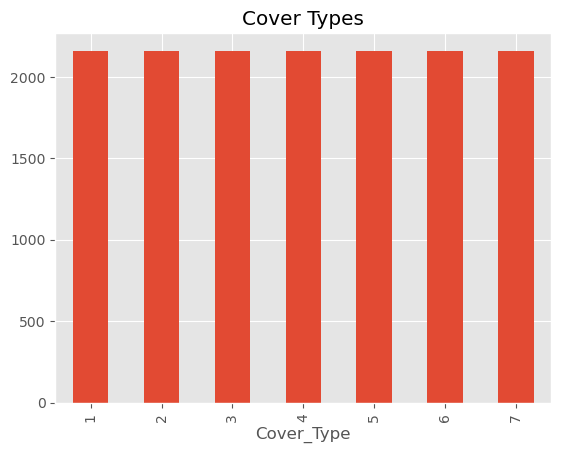

In [57]:
# Our target variable, Cover Type, is well balanced between different classes which is a good thing 
# for further classification algorithm

train_univar[target].value_counts().sort_index().plot(kind='bar', title="Cover Types")
plt.show()

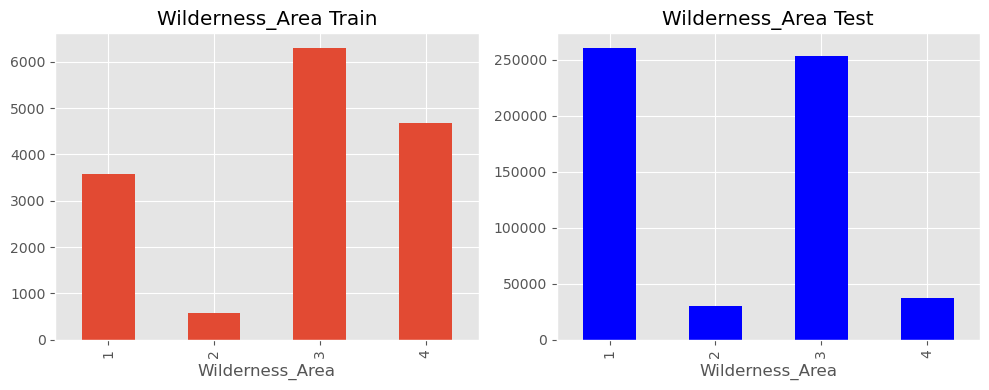

In [75]:
# Wilderness Area 1 and 4 are not similarly distributed between train/test

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
train_univar['Wilderness_Area'].value_counts().sort_index().plot(kind='bar', title="Wilderness_Area Train")

plt.subplot(1, 2, 2)
test_univar['Wilderness_Area'].value_counts().sort_index().plot(kind='bar', title="Wilderness_Area Test", color='b')

plt.tight_layout()
plt.show()

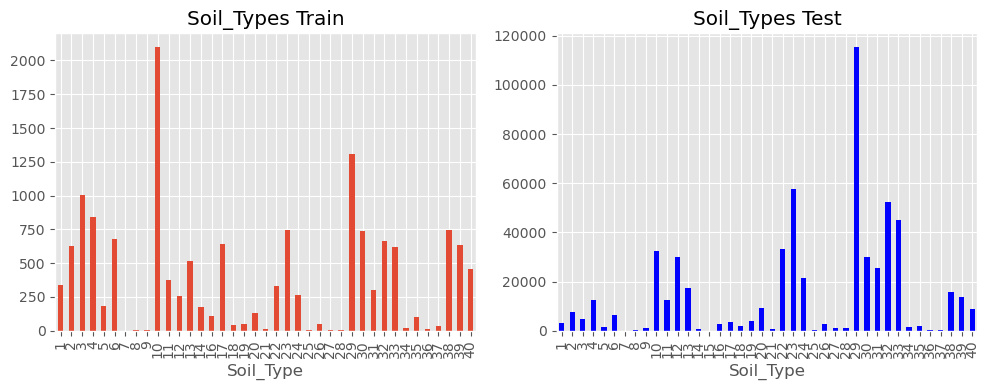

In [77]:
# Soil_Type 10 is overrepresented in train only, but 29 is in both train and test.

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
train_univar['Soil_Type'].value_counts().sort_index().plot(kind='bar', title="Soil_Types Train")

plt.subplot(1, 2, 2)
test_univar['Soil_Type'].value_counts().sort_index().plot(kind='bar', title="Soil_Types Test", color='b')

plt.tight_layout()
plt.show()

### Continuous analysis : histplot, kde, boxplot 

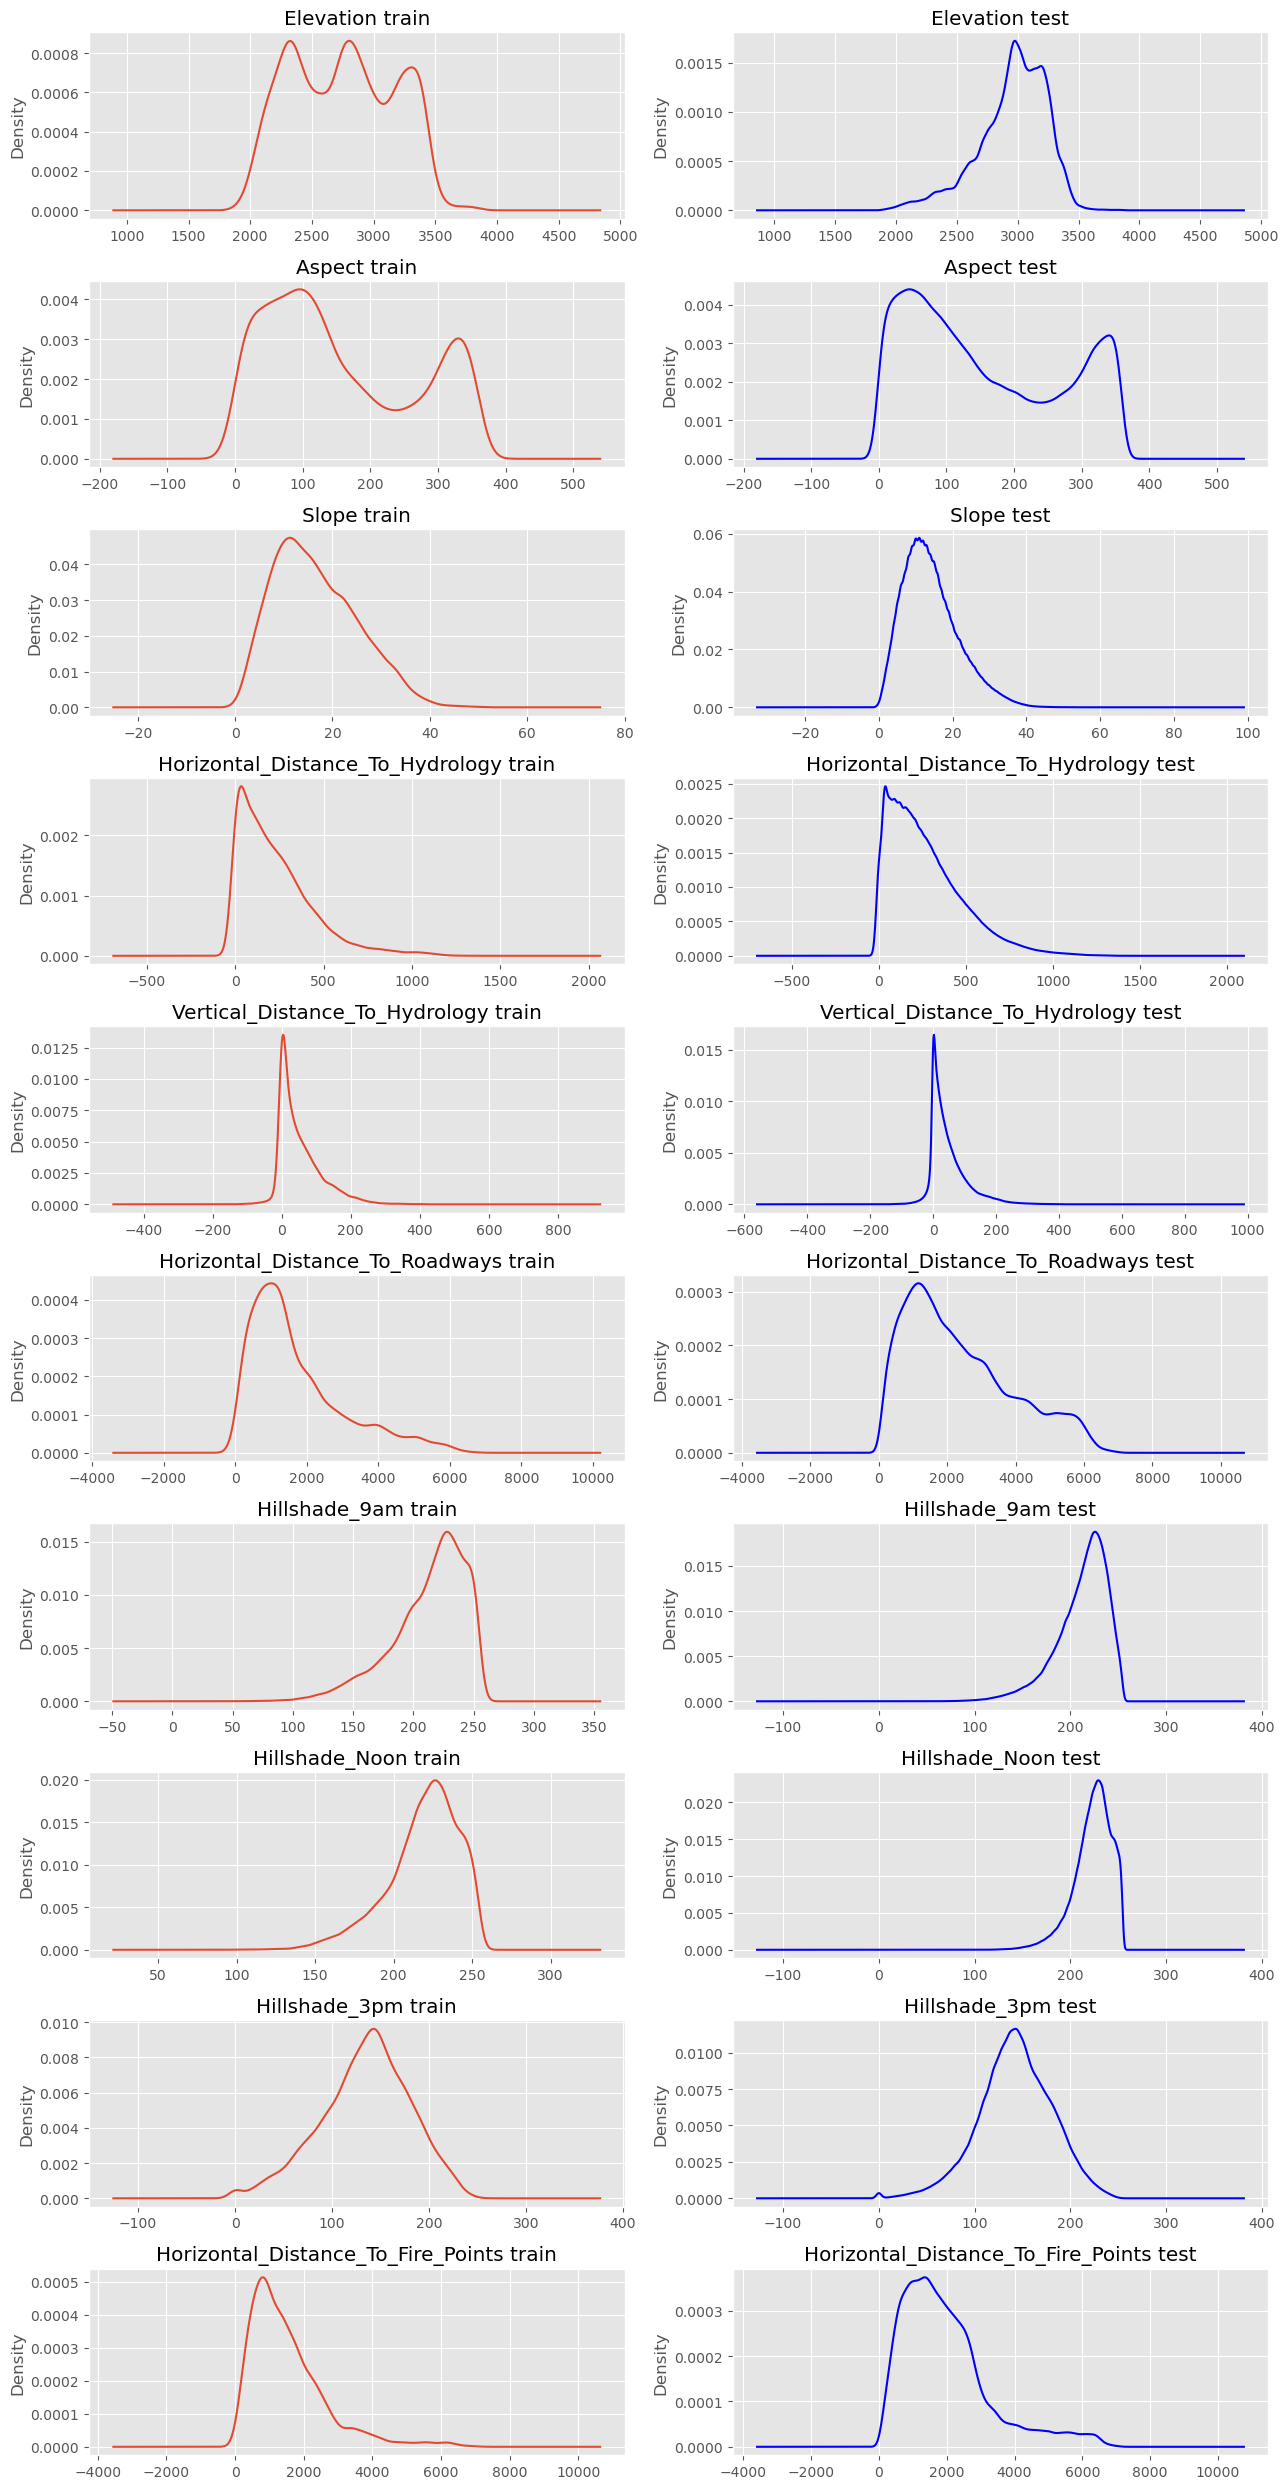

In [89]:
plt.figure(figsize=(13, 25))
n = len(numerical_cols)

for i, col in enumerate(numerical_cols):
    plt.subplot(n, 2, 2*i + 1)
    train_univar[col].plot(kind='kde', title=col + " train")
    
    plt.subplot(n, 2, 2*(i+1))
    test_univar[col].plot(kind='kde', title=col + " test", color='b')

plt.tight_layout()
plt.show()

In [92]:
# Variables significantly different from 0 are considered skewed

train_univar[numerical_cols].skew().sort_values(ascending=False)

Horizontal_Distance_To_Fire_Points    1.651684
Vertical_Distance_To_Hydrology        1.509920
Horizontal_Distance_To_Hydrology      1.438858
Horizontal_Distance_To_Roadways       1.247749
Slope                                 0.532567
Aspect                                0.466449
Elevation                             0.074424
Hillshade_3pm                        -0.353418
Hillshade_Noon                       -0.942747
Hillshade_9am                        -1.075491
dtype: float64

In [93]:
# Variables significantly different from 0 are considered skewed

test_univar[numerical_cols].skew().sort_values(ascending=False)

Vertical_Distance_To_Hydrology        1.790250
Horizontal_Distance_To_Fire_Points    1.288644
Horizontal_Distance_To_Hydrology      1.140437
Slope                                 0.789273
Horizontal_Distance_To_Roadways       0.713679
Aspect                                0.402628
Hillshade_3pm                        -0.277053
Elevation                            -0.817596
Hillshade_Noon                       -1.063056
Hillshade_9am                        -1.181147
dtype: float64

Main differences in distribution between train and test sets appear for the following variables : 
- `Elevation`
- `Slope`
- `Horizontal_Distance_To_Roadways`

> Some variables have a skewed distribution (`Hillshade_Noon`, `Hillshade_9am`,  `Horizontal_Distance_To_x` and `Vertical_Distance_To_x`, `Elevation`, `Slope`) which can drive down model's performances in some cases. In those cases, we may want to renormalise skewed data with techniques such as transformation with a function (log, square/cube root, reciprocal, square) outliers removal, normalisation (min-max) 

> With tree based algorithms, however, skewed data isn't that problematic.
Moreover, as here we are dealing with a classification problem, this issue isn't as much important as though we were dealing with regression problem.

In [ ]:
# We test only on train set for matters of computation costs 

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=False)

skewed_variables = ['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points',
                    'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                    'Hillshade_Noon', 'Hillshade_9am'
                   ]

df_normalized = pd.DataFrame(pt.fit_transform(train_univar[skewed_variables]), columns=skewed_variables)

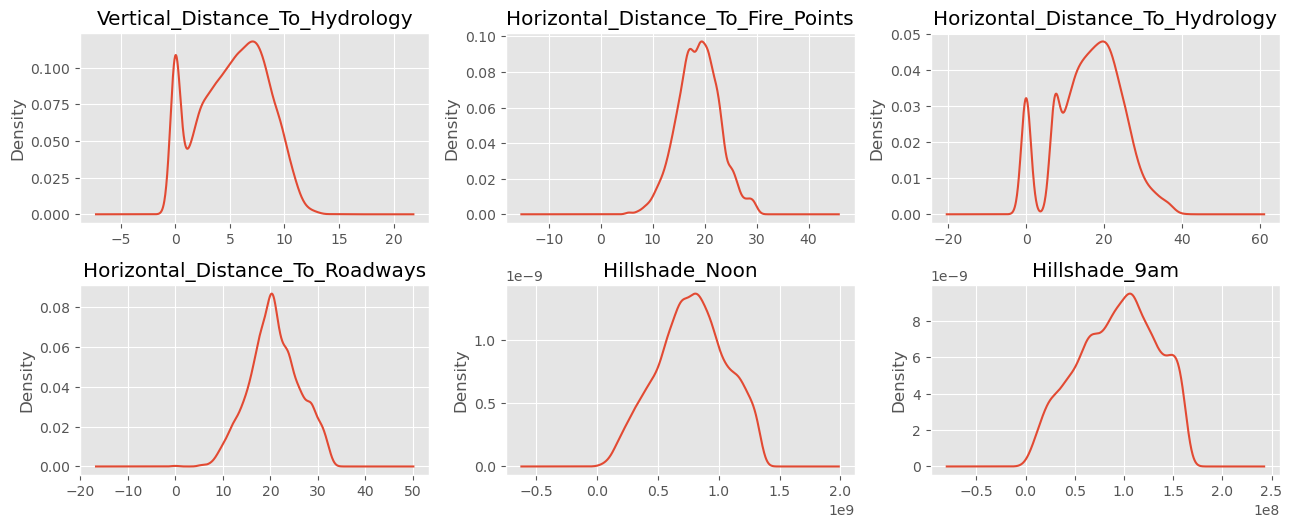

In [50]:
plt.figure(figsize=(13, 10))

for i in range(df_normalized.shape[1]):
    plt.subplot(4, 3, i+1)
    df_normalized.iloc[:, i].plot(kind='kde', title=skewed_variables[i])

plt.tight_layout()
plt.show()

In [51]:
df_normalized.skew().sort_values(ascending=False)

Horizontal_Distance_To_Fire_Points    0.006758
Horizontal_Distance_To_Roadways      -0.015715
Hillshade_Noon                       -0.104018
Vertical_Distance_To_Hydrology       -0.127983
Horizontal_Distance_To_Hydrology     -0.187901
Hillshade_9am                        -0.196783
dtype: float64

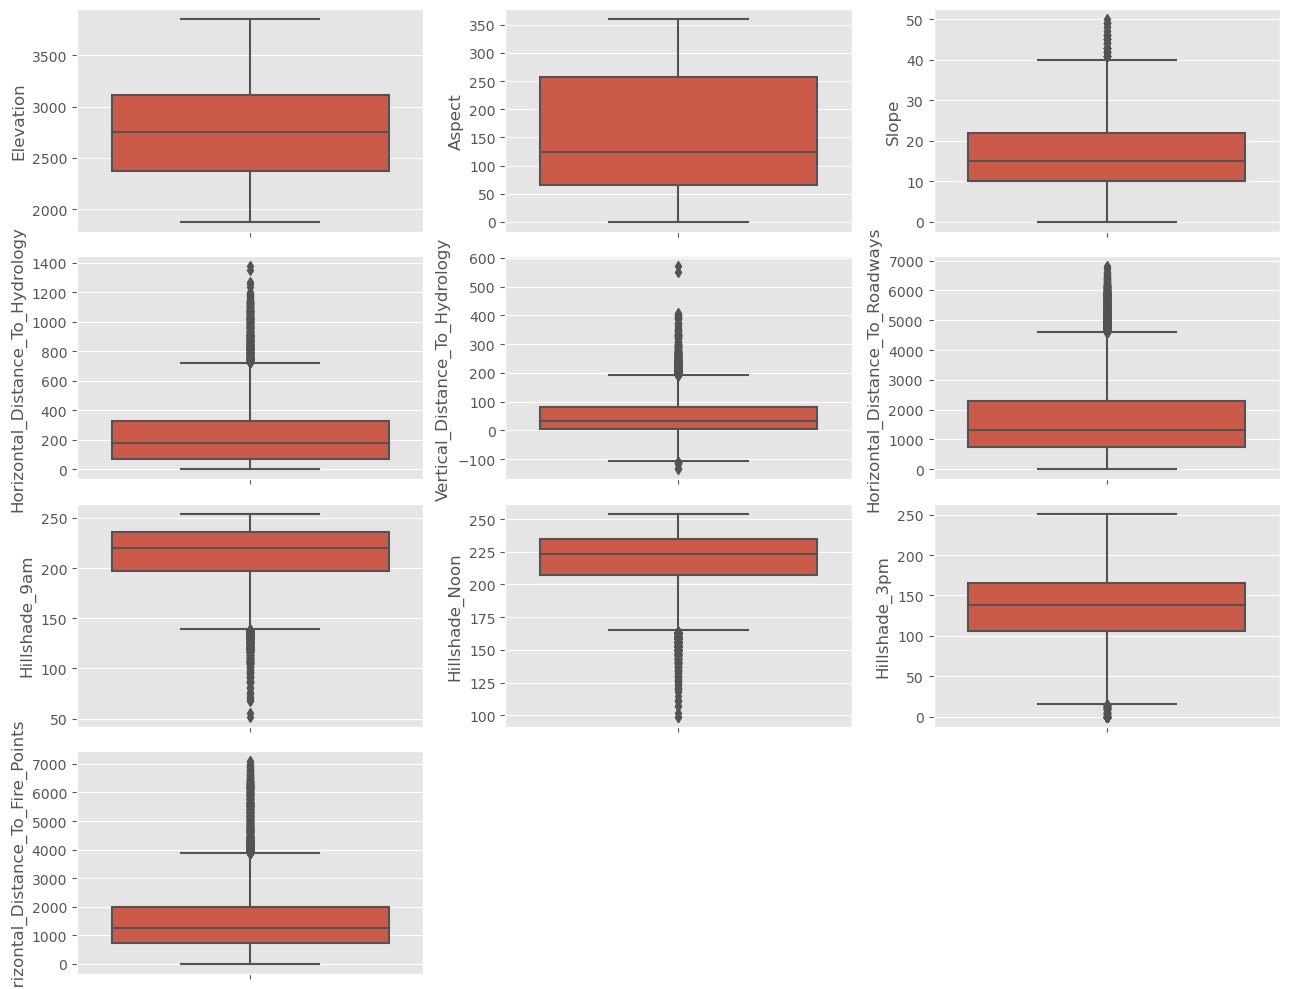

In [37]:
# Boxplots to focus on outliers detection

plt.figure(figsize=(13, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=col, data=train_univar)

plt.tight_layout()
plt.show()

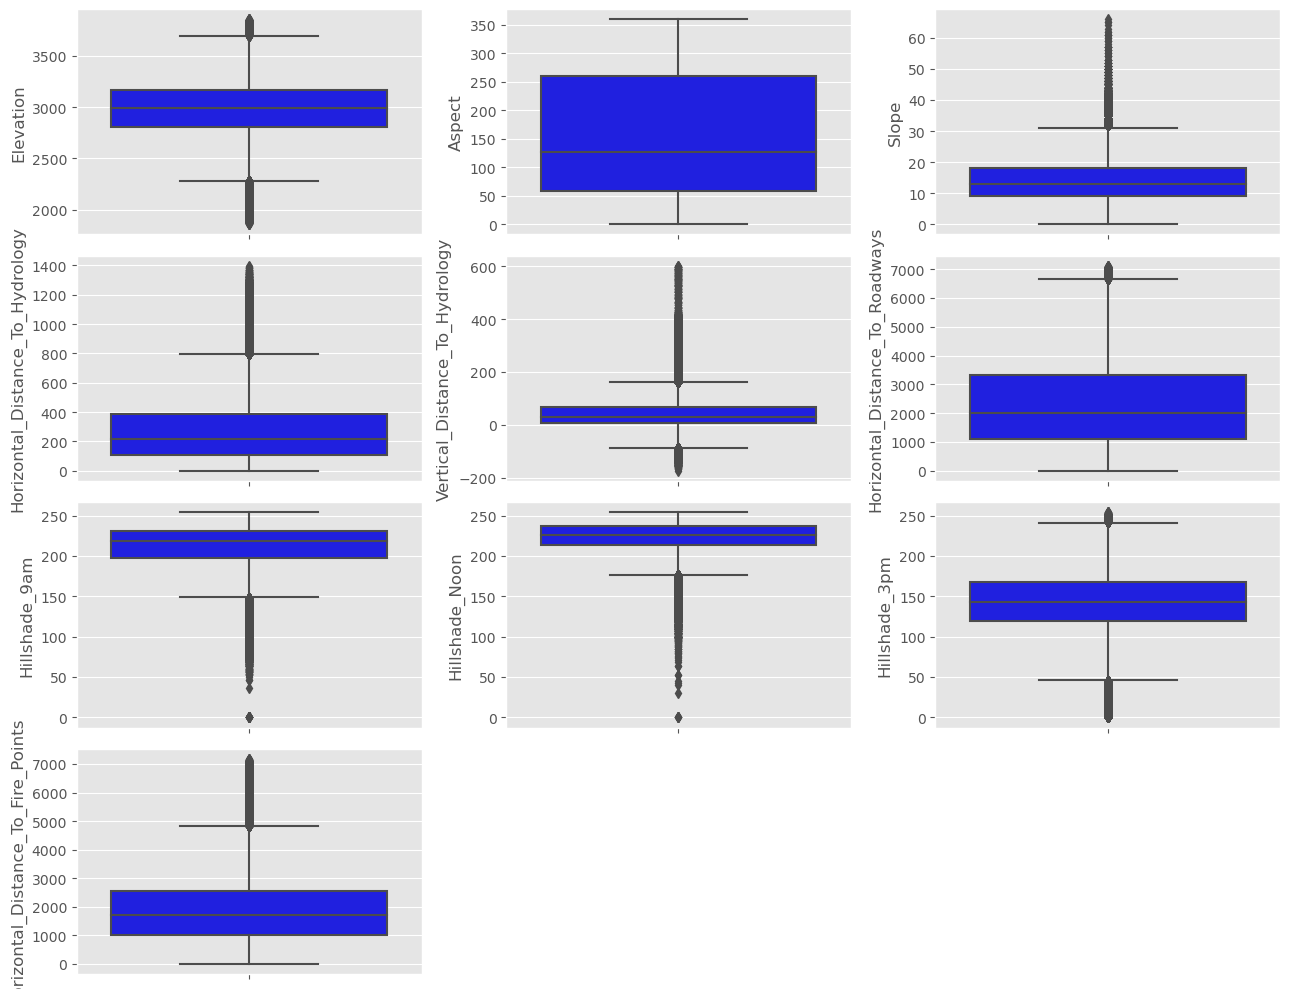

In [90]:
# Boxplots on test set

plt.figure(figsize=(13, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=col, data=test_univar, color='b')

plt.tight_layout()
plt.show()

Boxplots confirm what we had seen with kde plots : there are a few outliers points that we may want to deal with before going further : 

- Z-Score ?

In [115]:
from scipy.stats import zscore

threshold = 2.9

(np.abs(zscore(train_univar[numerical_cols], axis=1)) > threshold).mean()

Elevation                             0.055489
Aspect                                0.000000
Slope                                 0.000000
Horizontal_Distance_To_Hydrology      0.000000
Vertical_Distance_To_Hydrology        0.000000
Horizontal_Distance_To_Roadways       0.000000
Hillshade_9am                         0.000000
Hillshade_Noon                        0.000000
Hillshade_3pm                         0.000000
Horizontal_Distance_To_Fire_Points    0.000000
dtype: float64

In [116]:
(np.abs(zscore(test_univar[numerical_cols], axis=1)) > threshold).mean()

Elevation                             0.029616
Aspect                                0.000000
Slope                                 0.000000
Horizontal_Distance_To_Hydrology      0.000000
Vertical_Distance_To_Hydrology        0.000000
Horizontal_Distance_To_Roadways       0.000000
Hillshade_9am                         0.000000
Hillshade_Noon                        0.000000
Hillshade_3pm                         0.000000
Horizontal_Distance_To_Fire_Points    0.000000
dtype: float64

Later, we can do an A/B testing by removing `Elevation` outliers to see their impact on performance.

# 3) Feature relationship

In [117]:
target = 'Cover_Type'

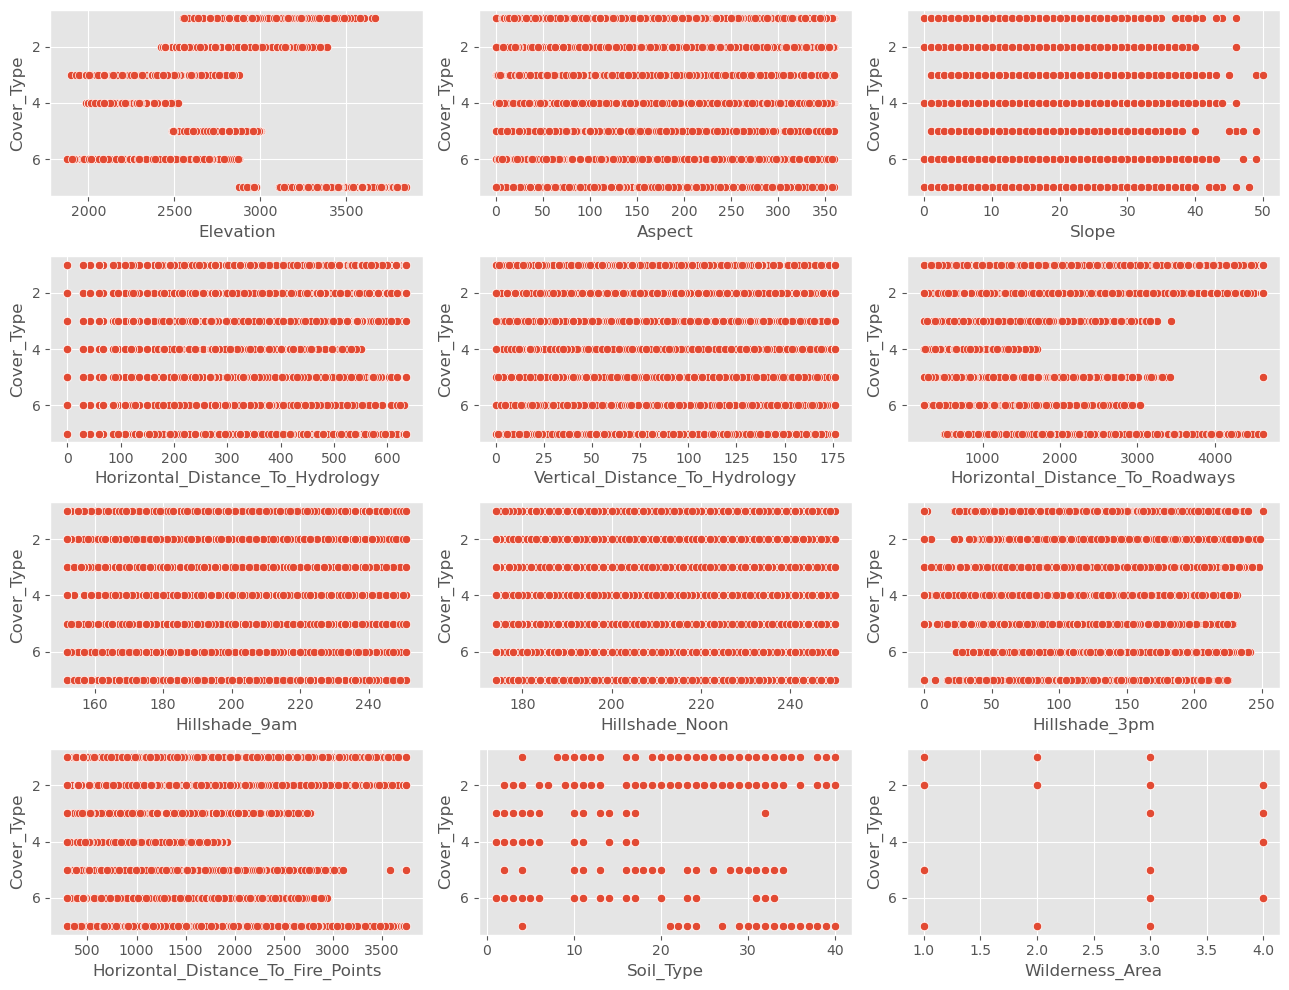

In [63]:
plt.figure(figsize=(13, 10))

for i, col in enumerate(train_univar.drop(columns=target).columns.to_list()):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(x=col, y=target, data=train_univar)

# Let's plot it in a nice way
plt.tight_layout()
plt.show()

 `Elevation`, `Soil_Type`and `Wilderness_Area` seem to explain `Cover_Type` the most.

/Users/alex/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


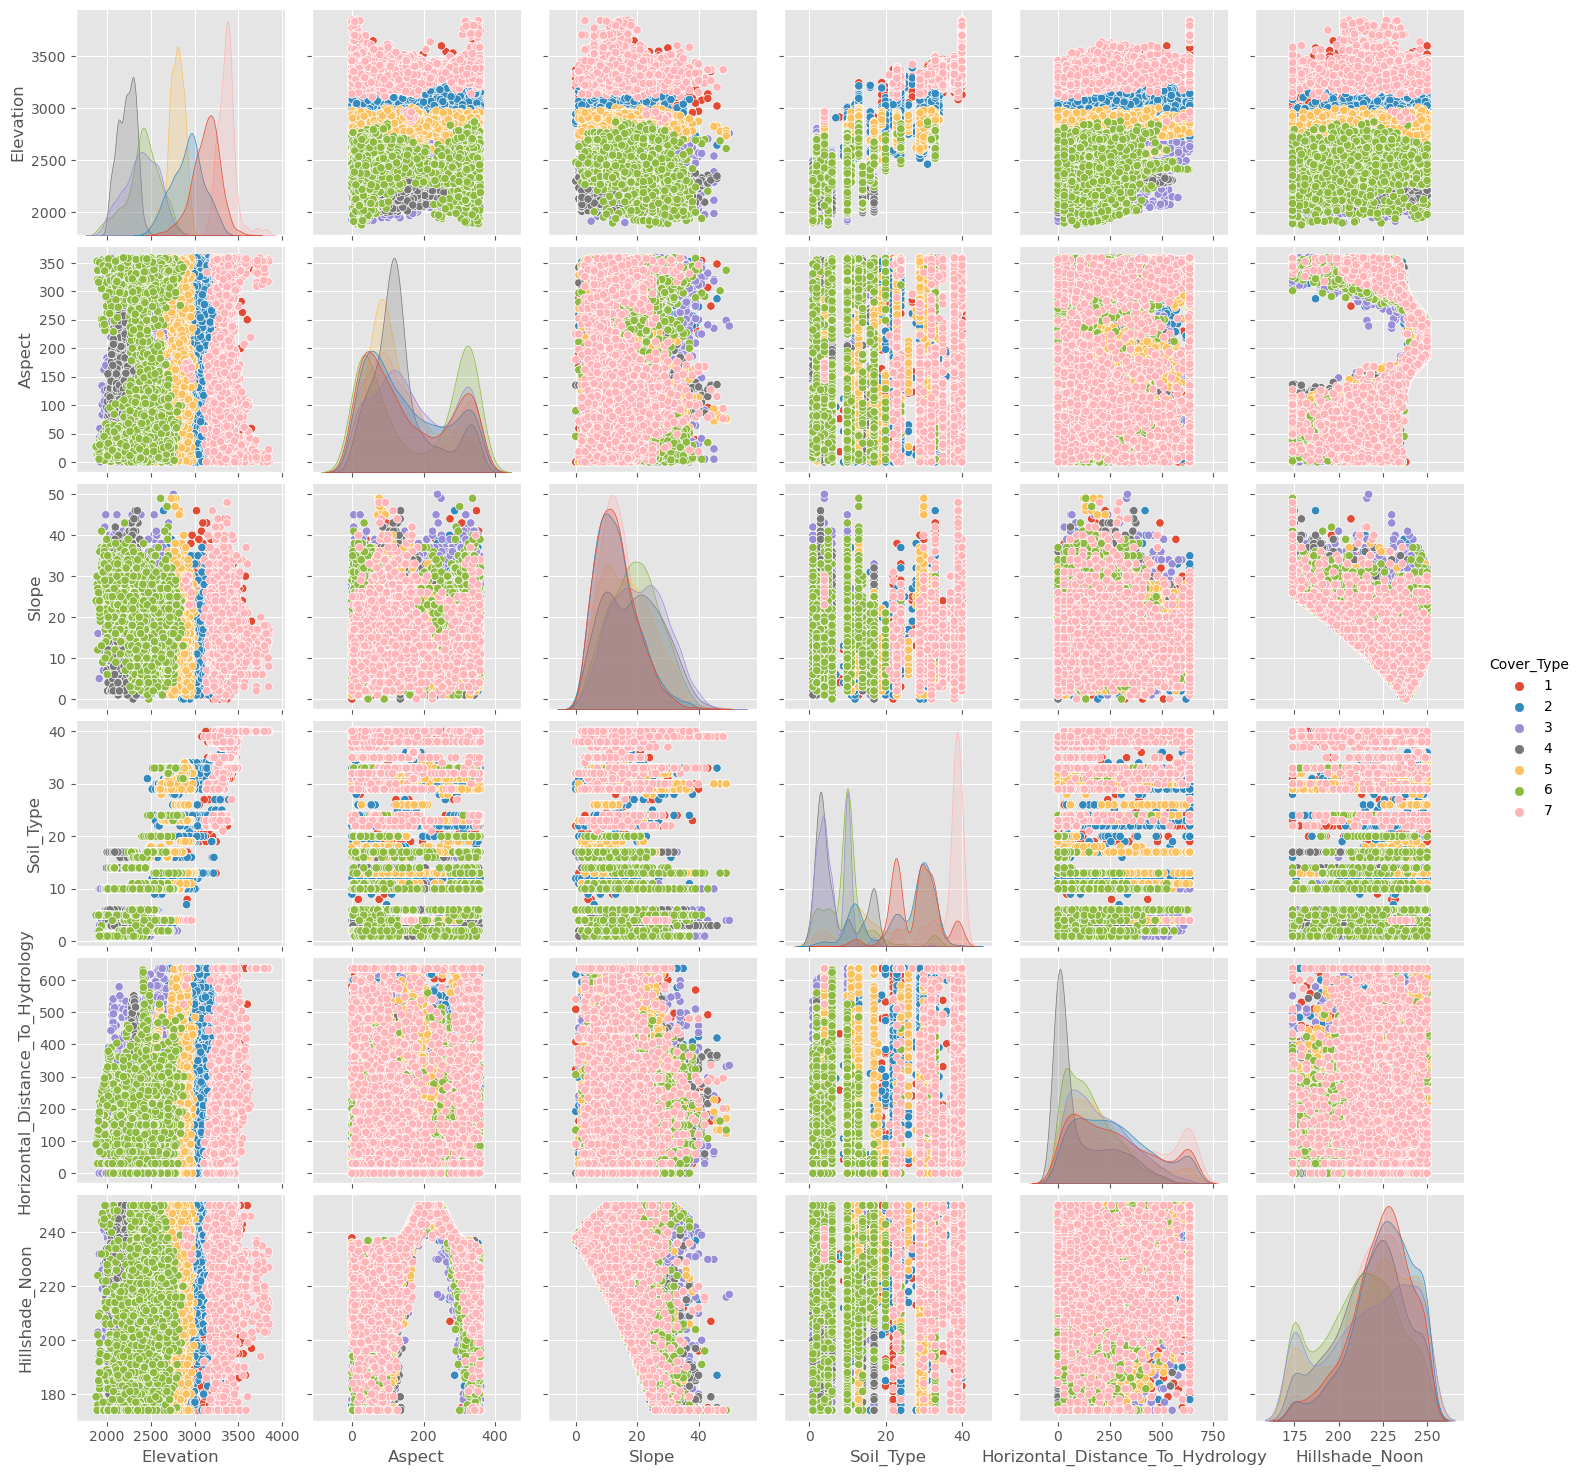

In [65]:
sns.pairplot(train_univar, vars=['Elevation', 'Aspect', 'Slope', 'Soil_Type',
                              'Horizontal_Distance_To_Hydrology', 'Hillshade_Noon'],
             hue=target)

plt.show()

Here, `Elevation` seems to clearly categorize (high positive correlation) our target when plotted against other variables.




### Correlation analysis

<Axes: >

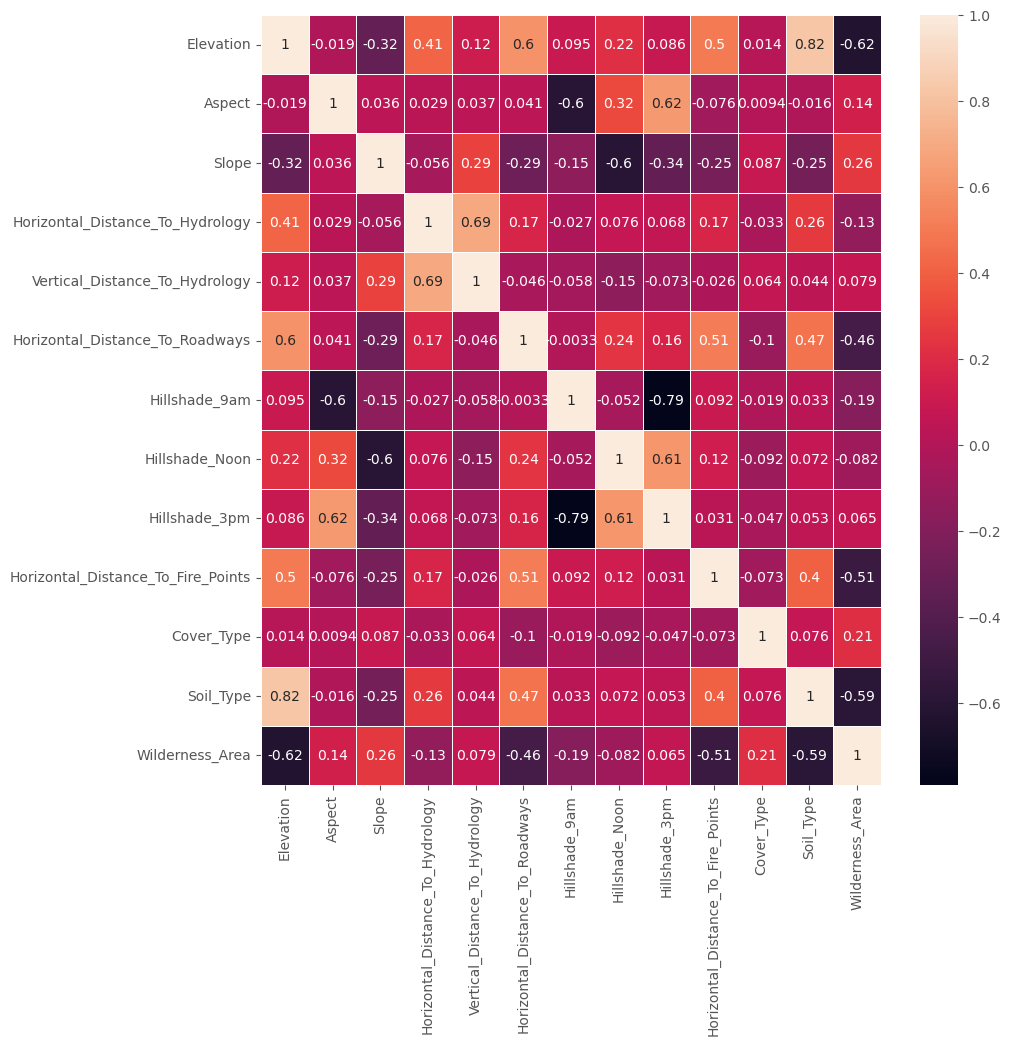

In [66]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_univar.corr(), annot=True, linewidths=.5)

> An idea could be to do some feature engineering to combine correlated covariates :



- `Elevation` : most correlated is `Soil_Type` --> multiply with `Soil_Type` ?
- `Aspect` with `Hillshade_9am` and `Hillshade_3pm`
- `Slope` and `Hillshade_Noon`
- `Horizontal_Distance_to_Hydrology`and `Vertical_Distance_to_Hydrology` --> new var : `Distance_to_Hydrology` is hypothenuse = sum of squared
- `Hillshade_3pm` much correlated with both `Hillshade_Noon` and `Hillshade_9am` --> keep only `Hillshade_3pm`
- `Wilderness_Area` with `Elevation` and `Soil_Type`


####  Let's build a feature engineering pipeline to apply the transformations that make most sense

### Feature engineering

In [14]:
def distance_to_hydrology_(X):
    X = X.copy()
    X['Distance_To_Hydrology'] = np.sqrt(X['Horizontal_Distance_To_Hydrology']**2 + X['Vertical_Distance_To_Hydrology']**2)
    X = X.drop(columns=['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'])
    return X


def hillshade_(X):
    X = X.copy()
    X["avg_hillshade"] = np.mean(X[["Hillshade_3pm", "Hillshade_9am", "Hillshade_Noon"]], axis=1)
    X = X.drop(columns=["Hillshade_3pm", "Hillshade_9am", "Hillshade_Noon"])
    return X


encoder_distance_ = FunctionTransformer(distance_to_hydrology_)
encoder_hillshade_ = FunctionTransformer(hillshade_)

> Let's encode the first 2 digits of the ELU code for soil types according to decription gave in Kaggle: 

First digit: climatic zone
- 1: lower montane dry
- 2: lower montane --> types 1-6
- 3: montane dry --> types 7-8
- 4: montane --> types 9-13
- 5: montane dry and montane --> 14-15
- 6: montane and subalpine --> 16-18 
- 7: subalpine --> 19-34
- 8: alpine --> 35-40


Second digit: geologic zones
- 1: alluvium --> 14-17, 19-21, 
- 2: glacial --> 9, 22-23, 
- 3: shale
- 4: sandstone
- 5: mixed sedimentary --> 7, 8, 
- 6: unspecified in the USFS ELU Survey
- 7: igneous and metamorphic --> 1-6, 10-13, 18, 24-40
- 8: volcanic

In [15]:
def elu1(x):
    if 1 <= x <= 6:
        return 2
    elif 7 <= x <= 8:
        return 3
    elif 9 <= x <= 13:
        return 4
    elif 14 <= x <= 15:
        return 5
    elif 16 <= x <= 18:
        return 6
    elif 19 <= x <= 34:
        return 7
    else:
        return 8
    
def elu2(x):
    if (14 <= x <= 17) or (19 <= x <= 21):
        return 1
    if (x == 9) or (x == 22) or (x==23):
        return 2
    if (x == 7) or (x == 8):
        return 5
    elif 14 <= x <= 15:
        return 5
    else:
        return 7
    
    
def elu_digits_(X):
    X = X.copy()
    X['elu1'] = X["Soil_Type"].apply(elu1)
    X['elu2'] = X["Soil_Type"].apply(elu2)
    return X


encoder_elu_ = FunctionTransformer(elu_digits_)

In [133]:
# Let's wrap our featre engineering functions in a pipeline

from sklearn.pipeline import make_pipeline


pipe_feature_engineering = make_pipeline(
    encoder_distance_,
    encoder_hillshade_,
    encoder_elu_
)

In [135]:
train_univar_augmented = pipe_feature_engineering.fit_transform(train_univar)

<Axes: >

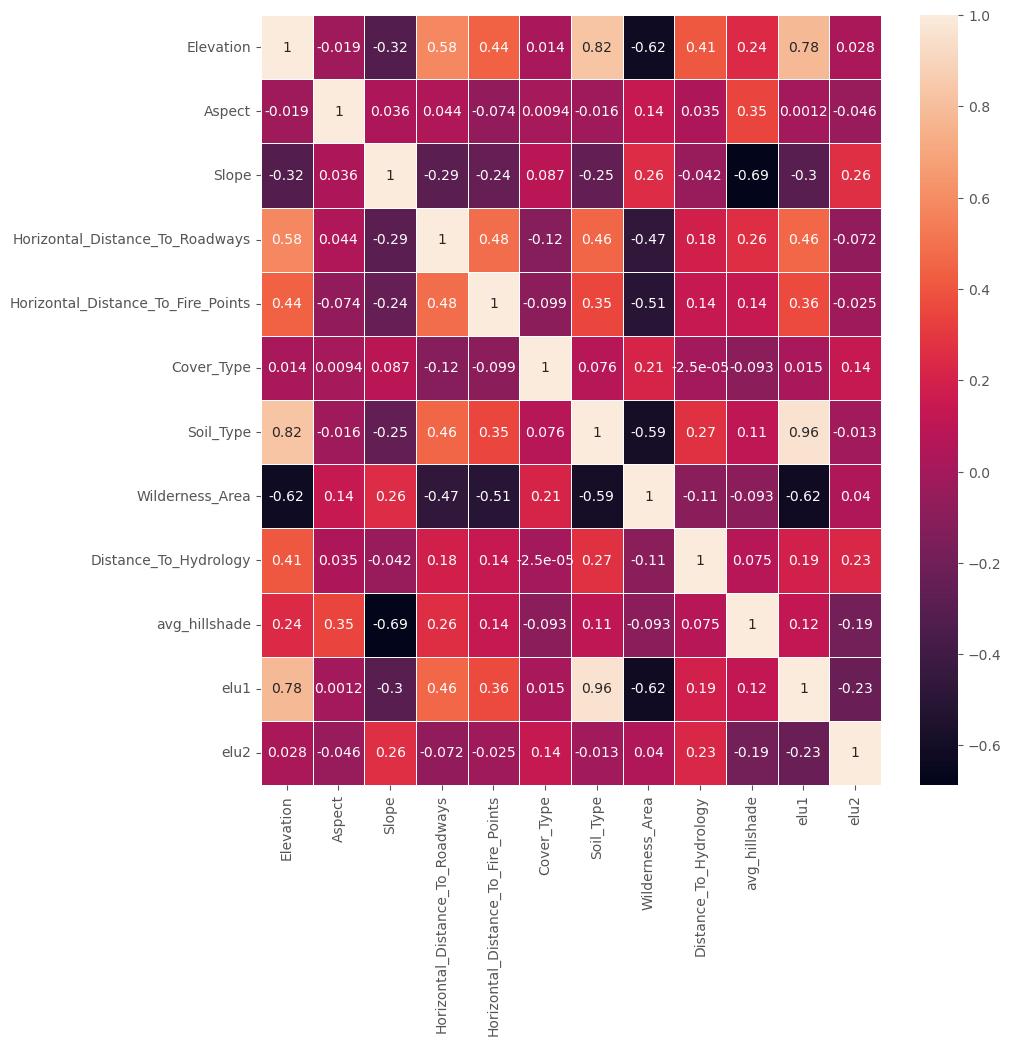

In [137]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_univar_augmented.corr(), annot=True, linewidths=.5)

# 4) PCA to plot data w/ hue = target

In [83]:
# We use train_df for this analysis in order to better see what happens when plotting as it has far less data points
# but doesn't change the intepretation as train_df has same distribution as cover_df

from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(train_univar.drop(columns=target))

PCA(n_components=2)

In [84]:
pca.explained_variance_ratio_

array([0.74200088, 0.2014097 ])

In [85]:
pca0, pca1 = pca.transform(train_univar.drop(columns=target))[:,0], pca.transform(train_univar.drop(columns=target))[:,1]

In [88]:
df_pca = pd.concat((pd.Series(pca0, name='pca0'), pd.Series(pca1, name='pca1'), train_univar[target].reset_index(drop=True)), axis=1)

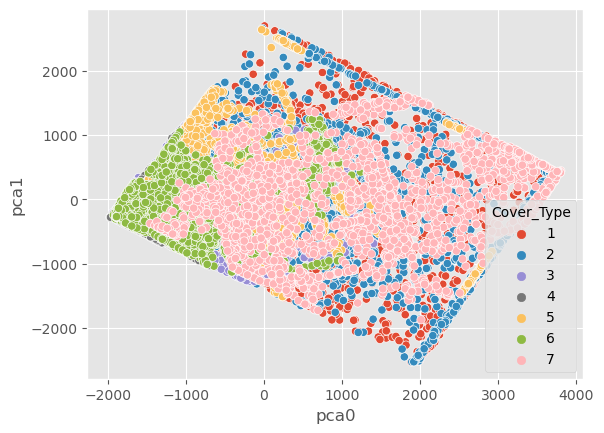

In [89]:
sns.scatterplot(x='pca0', y='pca1', hue=target, data=df_pca)
plt.show()

# Idea following PCA

Here we see a big cluster in pink (cover_type 7). An idea to enhance our model could be to use Boosting in the following way : 
- first predict to which big cluster the Cover_Type belongs (e.g : Cluster 1 = types 1, 2, 3 ; Cluster 2 = types 4, 5, 6, 7)
- among the predicted cluster, apply another model to detect which Cover_Type it is 

# 5) Tranformer pipelines

In [139]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, PowerTransformer




# 1. Apply our feature engineering steps to the dataset

pipe_feature_engineering = make_pipeline(
    decoder_dummy_,
    encoder_distance_,
    encoder_hillshade_,
    encoder_elu_
)


# 3. Encode/standardize variables and remove outliers

#skewed_cols = ['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points',
 #                   'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
  #                  'Hillshade_Noon', 'Hillshade_9am']

categorical_cols = ["Wilderness_Area", "Soil_Type", 'elu1', 'elu2']

numerical_cols = ['Id', 'Aspect', 'Slope', 'Elevation', 'Horizontal_Distance_To_Roadways',
                  'Hillshade_3pm', 'Hillshade_9am', 'Hillshade_Noon', 'Vertical_Distance_To_Hydrology',
                  'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology',
                  'Horizontal_Distance_To_Roadways', 'Hillshade_Noon', 'Hillshade_9am'] 


preprocessor = ColumnTransformer(
    [
        #('skewed', PowerTransformer(), skewed_cols),
        ("categorical", OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_cols),
        ("numerical", StandardScaler(), numerical_cols),
        #("hillshade", HillshadeEncoder(), hillshade_cols)
    ]
)

In [140]:
# Final transformer pipeline

full_pipe_transformer = make_pipeline(
    pipe_feature_engineering,
    preprocessor
)  

In [141]:
full_pipe_transformer.fit_transform(cover_df)

ValueError: A given column is not a column of the dataframe

# 6) Modelisation

## a) Train/Test split

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X = cover_df.drop(columns="Cover_Type")
y = cover_df["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [133]:
print(X_train.shape)
print(X_test.shape)

(11340, 55)
(3780, 55)


## b) Model testing

In [136]:
# Models to test 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC

classifiers = [LogisticRegression(max_iter=10_000),
               SVC(),
               RandomForestClassifier(), 
               HistGradientBoostingClassifier()
              ]

### i. Baseline

In [137]:
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    print(f"Accuracy with a {classifier.__class__.__name__} is {classifier.score(X_train, y_train):.5f} on train set and {classifier.score(X_test, y_test):.5f} on test set.")

/Users/alex/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with a LogisticRegression is 0.39938 on train set and 0.40159 on test set.
Accuracy with a SVC is 0.39541 on train set and 0.38095 on test set.
Accuracy with a RandomForestClassifier is 1.00000 on train set and 0.87989 on test set.
Accuracy with a HistGradientBoostingClassifier is 0.98783 on train set and 0.88122 on test set.


### ii. Second baseline

In [143]:
# Now, let's use our pipeline to see how much it improves scores on baseline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline


improved_baseline_transformer = ColumnTransformer([
    ("numerical", StandardScaler(), numerical_cols)
])

for classifier in classifiers:
    pipe = make_pipeline(
      improved_baseline_transformer,
      classifier
      )
    pipe.fit(X_train, y_train)
    print(f"Accuracy with a {classifier.__class__.__name__} is {pipe.score(X_train, y_train):.5f} on train set and {pipe.score(X_test, y_test):.5f} on test set.")

Accuracy with a LogisticRegression is 0.65309 on train set and 0.64444 on test set.
Accuracy with a SVC is 0.71896 on train set and 0.69974 on test set.
Accuracy with a RandomForestClassifier is 1.00000 on train set and 0.80265 on test set.
Accuracy with a HistGradientBoostingClassifier is 0.97549 on train set and 0.83254 on test set.


### iii. Trying to outperform baseline with transformer pipeline

In [148]:
for classifier in classifiers:
    pipe = make_pipeline(
      pipe_transformer,
      classifier
      )
    pipe.fit(X_train, y_train)
    print(f"Accuracy with a {classifier.__class__.__name__} is {pipe.score(X_train, y_train):.5f} on train set and {pipe.score(X_test, y_test):.5f} on test set.")

/Users/alex/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy with a LogisticRegression is 0.73025 on train set and 0.73783 on test set.


/Users/alex/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy with a SVC is 0.82002 on train set and 0.79048 on test set.


/Users/alex/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy with a RandomForestClassifier is 1.00000 on train set and 0.87381 on test set.


/Users/alex/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy with a HistGradientBoostingClassifier is 0.98554 on train set and 0.88069 on test set.


Ensemble methods are the best in any case and give the best result in the baseline without preprocessing.

# 9) Focus on RandomForetClassifier

In [149]:
# Let's first tune RFC hyperparameters on raw data, without preprocessing as we saw earlier it lowers performance

from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 30, None],
    'criterion': ['gini', 'entropy', 'log_loss']
} 

rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)

rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 30, None],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [150]:
rfc_grid.best_params_

{'criterion': 'log_loss', 'max_depth': 30, 'n_estimators': 300}

In [151]:
rfc_grid.best_score_

0.875925925925926

In [152]:
print("Accuracy on train set: ", rfc_grid.best_estimator_.score(X_train, y_train))
print("Accuracy on validation set: ", rfc_grid.best_estimator_.score(X_test, y_test))

Accuracy on train set:  1.0
Accuracy on validation set:  0.8764550264550265


In [159]:
rfc = rfc_grid.best_estimator_

In [171]:
# Then, we can try to one hot encode the target variable to see whether it has influence on the score

y_train_encoded_ = pd.get_dummies(y_train)
y_test_encoded_ = pd.get_dummies(y_test)

In [172]:
rfc.fit(X_train, y_train_encoded_)

rfc.score(X_test, y_test_encoded_)

0.83994708994709

# Further steps : neural network ?

For neural network, we would like to try a softmax output and see if previously one hot encoding the target has an influence on the performance 

In [1]:
import torch
from torch import nn

import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

# OLD VERSION

In [113]:
# y_test.shape
label_df['Cover_Type'].shape

(581012,)

In [114]:
label_df.to_csv('test_predictions.csv', index=False)

In [ ]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.2,1.0,10), cv=5)

In [5]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.legend()

NameError: name 'N' is not defined